## Importing libraries

In [2]:
import os
import pandas as pd
from sklearn import metrics, linear_model 
import joblib
import matplotlib.pyplot as plt

## Read dataset from path

In [3]:
dataset_path = os.path.join('dataset/', 'training_dataset.csv')
data = pd.read_csv(dataset_path)
data_array = data.values

# labeling male and female to 0's and 1's
for i in range(len(data_array)):
    if data_array[i][0] == 'Male':
        data_array[i][0] = 0
    else:
        data_array[i][0] = 1
        
data_frame = pd.DataFrame(data_array)

X = data_frame[[0, 1, 2, 3, 4, 5, 6]].values
Y = data_frame[7].values

data.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


## Visualization

328
381


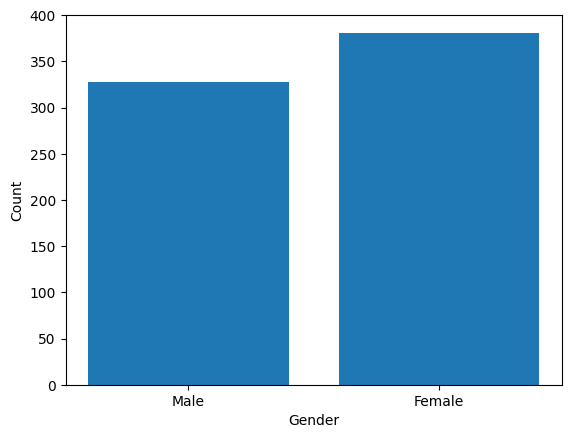

In [4]:
male_count = 0
female_count = 0
for i in range(len(data_array)):
  if data_array[i][0] == 0:
    male_count += 1
  else:
    female_count += 1

print(male_count)
print(female_count)
df = [['Male', male_count], ['Female', female_count]]
df = pd.DataFrame(df, columns=['Gender', 'count'])
plt.bar(df['Gender'], df['count'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig('count_type.png')

## Model Architecture and training

In [48]:
model = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter =1000)
model.fit(X,Y)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

## saving best model

In [ ]:
joblib.dump(model, 'best_model.pkl')

## Model Prediction/Testing

In [44]:
test_path = os.path.join('dataset/', 'test.csv')
test_data = pd.read_csv(test_path)
test_array = test_data.values
for i in range (len(test_array)):
    if test_array[i][0] == 'Male':
        test_array[i][0] = 0
    else: 
        test_array[i][0] = 1
        
df1 = pd.DataFrame(test_array)
test_x = df1[[0,1,2,3,4,5,6]].values
test_y = df1[7].values
preds = model.predict(test_x)

[[1 20 7 ... 9 5 5]
 [0 17 5 ... 5 2 4]
 [1 25 5 ... 7 2 4]
 ...
 [0 18 7 ... 6 2 7]
 [0 23 6 ... 5 4 3]
 [1 18 5 ... 3 5 6]]
['dependable' 'serious' 'serious' 'serious' 'responsible' 'serious'
 'serious' 'serious' 'serious' 'serious' 'serious' 'responsible'
 'responsible' 'serious' 'lively' 'extraverted' 'serious' 'serious'
 'serious' 'extraverted' 'serious' 'extraverted' 'serious' 'extraverted'
 'serious' 'serious' 'extraverted' 'extraverted' 'serious' 'responsible'
 'serious' 'lively' 'extraverted' 'lively' 'serious' 'serious' 'serious'
 'serious' 'extraverted' 'serious' 'responsible' 'responsible' 'serious'
 'lively' 'serious' 'serious' 'responsible' 'dependable' 'serious'
 'extraverted' 'serious' 'serious' 'serious' 'lively' 'extraverted'
 'serious' 'extraverted' 'serious' 'serious' 'serious' 'responsible'
 'serious' 'dependable' 'serious' 'serious' 'responsible' 'serious'
 'serious' 'serious' 'serious' 'serious' 'serious' 'serious' 'serious'
 'responsible' 'extraverted' 'serious'

## Model Accuracy and Confusion Matrix

In [45]:
print("Accuracy: ", metrics.accuracy_score(test_y, preds, normalize=True, sample_weight=None) * 100)
print("Performance of the model on the data \n\n ", metrics.classification_report(test_y, preds))

Accuracy:  85.71428571428571
Performance of the model on the data 

                precision    recall  f1-score   support

  dependable       0.78      0.33      0.47        21
 extraverted       0.83      0.92      0.87        77
      lively       0.95      0.75      0.84        24
 responsible       0.96      0.65      0.78        40
     serious       0.85      0.97      0.91       153

    accuracy                           0.86       315
   macro avg       0.87      0.72      0.77       315
weighted avg       0.86      0.86      0.85       315



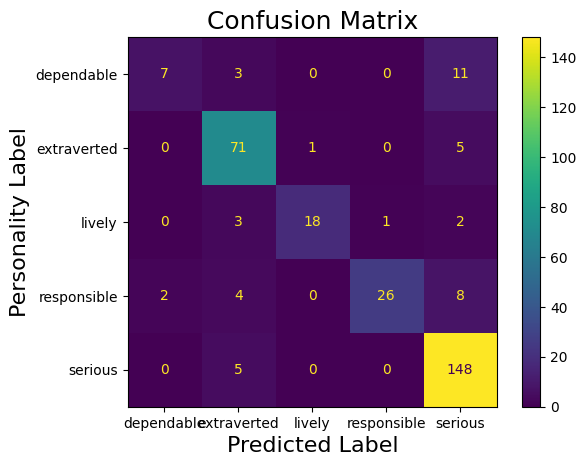

In [46]:
metrics.ConfusionMatrixDisplay.from_predictions(test_y, preds, normalize=None)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('Personality Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('result.png')
